#  PHASE 3 PROJECT


Student name: Joan Nyamache

Student pace: Remote

Scheduled project review date/time:

Instructor name: Asha Deen


# Project Overview

SyriaTel, a prominent telecommunications company, is confronting the issue of customer churn. To mitigate financial losses and ensure the company's longevity, this project seeks to create a classification model that predicts customer churn by identifying the patterns and factors associated with it. By leveraging these insights, the company can implement proactive strategies to retain customers and promote sustained growth.

# Problem Statement

SyriaTel Telecommunications is committed to connecting people through seamless communication. In their continuous quest for excellence, they have faced the challenge of customer churn. Each lost customer not only represents a severed connection but also threatens the company's financial growth and future. By analyzing the factors and patterns associated with churn and developing an effective classification model to predict it, SyriaTel can implement targeted actions to prevent churn and ensure business continuity.

This analysis explores the patterns and predictors of customer churn at SyriaTel, a leading telecommunications provider. By examining customer usage data, service plans, and interaction history, we employ statistical analysis and machine learning models to identify the primary drivers of churn. The study aims to segment the customer base, assess the impact of various service features on customer retention, and develop a predictive model to identify at-risk customers. The insights gained from this analysis will guide targeted interventions to enhance customer satisfaction and loyalty, reduce churn rates, and promote long-term business growth.

Import Data and necessary Libraries

In [32]:
#Importing the relevant libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [33]:
#Loading the data

df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Data Understanding

Exploring the data to get;

Shape of the data

Categorical variables

Outliers or errors

The data types

Missing values

The duplicates


In [34]:
# Shape of the data
df.shape

(3333, 21)

In [35]:
# An overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [36]:
# Number of columns
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [37]:
#Checking for missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [38]:
# Checking for duplicates
df.duplicated().sum()

0

In [39]:
# A statistical summary of the data
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [40]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

Data findings

The dataset consists of four main data types; float, integer, bool and object.

There are no missing values.

There are no duplicated rows in this dataset.

The dataset contains 21 columns and 3333 rows. This means there are 21 different variables each with 3333 records.

Checking for validity

Verify that every column in the dataset is accurate and appropriate for this analysis, and remove any that are not.

I'll drop Phone Number variable because it doesn't seem to have any effect on the dataset.

In [41]:
#Dropping the phone number variable
data = df.drop(['phone number'], axis = 1)

The churn variable is in boolean type, I will convert it to an integer so that 0 represents False and 1 represents True.

In [42]:
#Converting the churn boolean variable to an integer
data['churn'] = data['churn'].astype(int)
data['churn'].dtype

dtype('int32')

Collinearity

Checking for collinearity in the dataset.

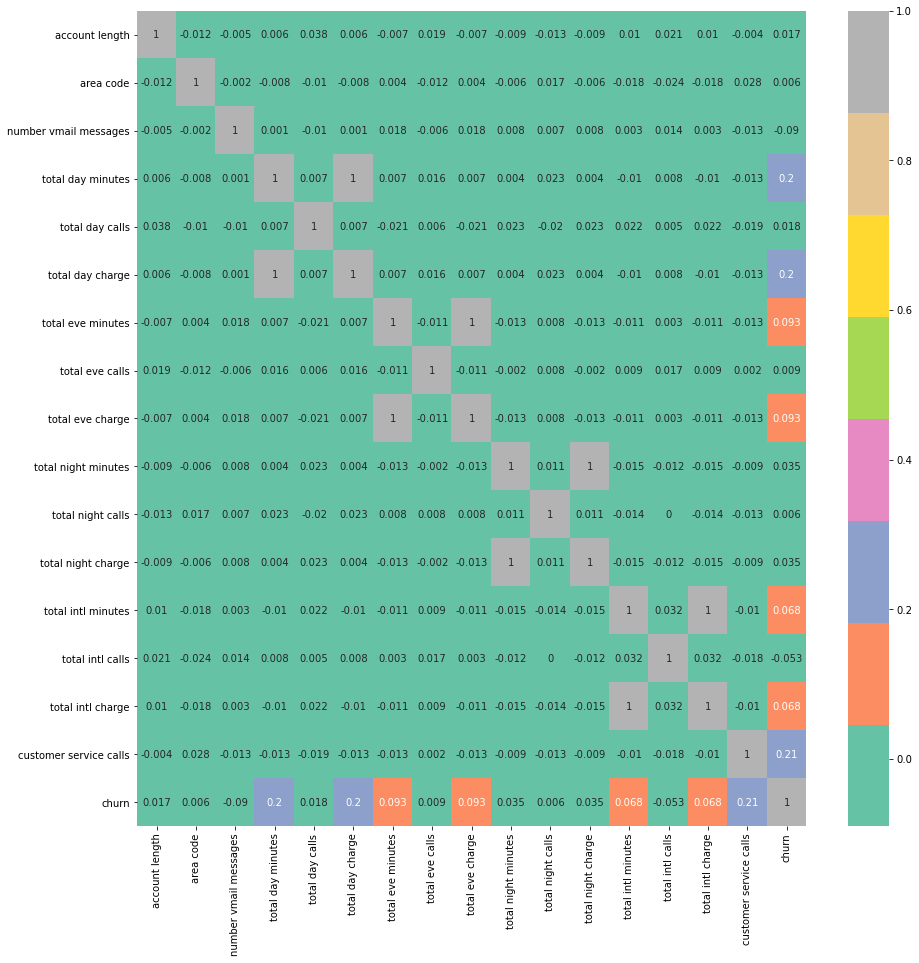

In [43]:
# collinearity check
corr = data.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr.round(3),annot = True,cmap = 'Set2')
plt.show()

The dataset contains highly correlated with a correlation of 1 as per the above graph:

a. Total day minutes and Total day charge

b. Total Eve minutes and Total eve charge

c. Total Night minutes and Total Night charge

d. Total Intl minutes and Total Intl charge

I will go ahead and drop all the variables with minutes so as to reduce multicollinearity

In [44]:
#Creating a function for the Variance Inflation Factor
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [45]:
#Calculating VIF having dropped the minutes variables so as to reduce high multicollinearity.
calculate_vif(df=data, features=['account length', 'area code', 'number vmail messages',
                                 'total day calls', 'total day charge',
                                 'total eve calls', 'total eve charge',
                                 'total night calls', 'total night charge', 
                                 'total intl calls', 'total intl charge',
                                 'customer service calls'])

,VIF,Tolerance
account length,1.002775,0.997233
area code,1.002344,0.997662
number vmail messages,1.000930,0.999071
total day calls,1.003877,0.996138
total day charge,1.001319,0.998683
total eve calls,1.001359,0.998643
total eve charge,1.001481,0.998521
total night calls,1.001967,0.998037
total night charge,1.001495,0.998508
total intl calls,1.002972,0.997037


The data has a reasonable Variance Inflation Factor as it is now below 5